In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import env as e
import wrangle as w

In [4]:
query = """
select bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
from propertylandusetype
	join properties_2017
		using (propertylandusetypeid)
WHERE propertylandusedesc = ("Single Family Residential")
"""

In [9]:
zillow = e.get_db_url('zillow')

In [11]:
zillow_df = pd.read_sql(query, zillow)

In [14]:
zillow_df.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [15]:
zillow_df.dtypes

bedroomcnt                      float64
bathroomcnt                     float64
calculatedfinishedsquarefeet    float64
taxvaluedollarcnt               float64
yearbuilt                       float64
taxamount                       float64
fips                            float64
dtype: object

In [20]:
zillow_df.yearbuilt.isnull().sum()

9337

Jacob says removing the null values is fine because it's only .4 sumn percent of the data, so we will move forward with this step in cleaning

In [26]:
zillow_df = zillow_df.dropna()

Jacob says dropping all the nulls only removes .58% of the data

In [34]:
zillow_df.yearbuilt = zillow_df.yearbuilt.astype(int)
zillow_df.bedroomcnt = zillow_df.bedroomcnt.astype(int)
zillow_df.fips = zillow_df.fips.astype(int)
zillow_df.taxvaluedollarcnt = zillow_df.taxvaluedollarcnt.astype(int) 
zillow_df.calculatedfinishedsquarefeet = zillow_df.calculatedfinishedsquarefeet.astype(int)

In [35]:
zillow_df.dtypes

bedroomcnt                        int64
bathroomcnt                     float64
calculatedfinishedsquarefeet      int64
taxvaluedollarcnt                 int64
yearbuilt                         int64
taxamount                       float64
fips                              int64
dtype: object

In [3]:
df = w.wrangle_zillow()

In [11]:
df.to_csv('zillow')

In [14]:
df.fips = df.fips.map({6037:'LA', 6059:'Orange', 6111:'Ventura'})

In [16]:
df.dtypes

bedroomcnt                        int64
bathroomcnt                     float64
calculatedfinishedsquarefeet      int64
taxvaluedollarcnt                 int64
yearbuilt                         int64
taxamount                       float64
fips                             object
taxvaluedollarcnt_bins            int64
dtype: object

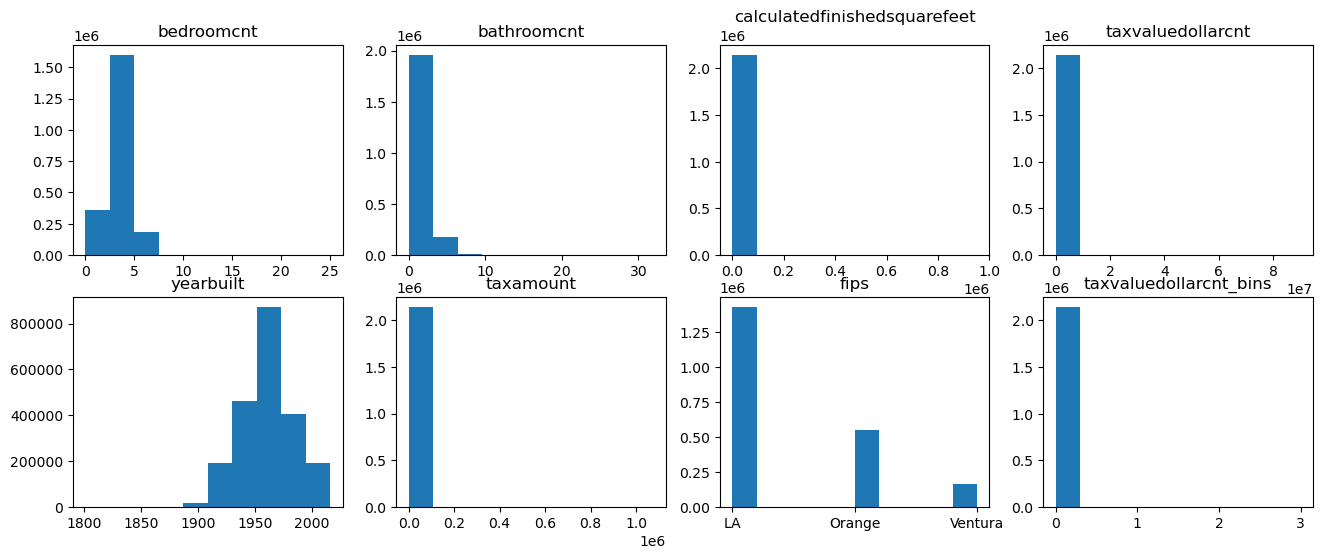

In [18]:
plt.figure(figsize=(16,6))

for i, col in enumerate(df.columns):
    plot_number = i+1
    plt.subplot(2,4,plot_number)
    plt.title(col)
    plt.hist(df[col])
plt.show()

In [20]:
α= 0.05

In [21]:
r, p = spearmanr, (train.exam1, train.final_grade)
r,p

NameError: name 'spearmanr' is not defined

In [4]:
# Create bins and labels
bins = pd.cut(df['taxvaluedollarcnt'], bins=4, labels=False)

# Create a new column with the bins
df['taxvaluedollarcnt_bins'] = bins

# Display the DataFrame with the new column
print(df)

         bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  \
4                 4          2.0                          3633   
6                 3          4.0                          1620   
7                 3          2.0                          2077   
11                0          0.0                          1200   
14                0          0.0                           171   
...             ...          ...                           ...   
2152856           4          4.0                          4375   
2152858           4          3.0                          2262   
2152859           4          4.5                          3127   
2152861           3          2.5                          1974   
2152862           4          4.0                          2110   

         taxvaluedollarcnt  yearbuilt  taxamount  fips  taxvaluedollarcnt_bins  
4                   296425       2005    6941.39  6037                       0  
6                   847770       2011   10244

In [8]:
df.taxvaluedollarcnt_bins.value_counts()

taxvaluedollarcnt_bins
0    2140082
1        135
2         13
3          5
Name: count, dtype: int64

In [6]:
print(df['taxvaluedollarcnt_bins'].value_counts())

taxvaluedollarcnt_bins
0    2140082
1        135
2         13
3          5
Name: count, dtype: int64


In [7]:
w.splitting_data(df,'taxvaluedollarcnt_bins')

(         bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  \
 602399            4          3.0                          1844   
 1222033           4          3.0                          2175   
 515300            3          2.0                          1294   
 452326            4          3.0                          2666   
 105346            4          4.0                          3174   
 ...             ...          ...                           ...   
 965456            3          3.0                          3512   
 460322            4          2.0                          1657   
 911166            3          2.0                          1652   
 734428            3          2.0                          1275   
 870503            3          2.0                          1766   
 
          taxvaluedollarcnt  yearbuilt  taxamount  fips  taxvaluedollarcnt_bins  
 602399              276670       1965    3455.87  6037                       0  
 1222033             109443   